<h1 style="color:rgb(138,0,3)">Laboratorio 3</h1>
<h3>Procesando	Texto	y	usando	scikit-learn</h3>

<p style="color:rgb(0,1,84)">Alumno: Leon Lautaro Reynosa</p>

<p style="color:rgb(0,1,84)">Legajo: 163262-0</p>

<p style="color:rgb(0,1,84)">Profesor: Hernan Borre</p>

<p style="color:rgb(0,1,84)">Materia: Procesamiento del Lenguaje Natural  (K3572) </p>

<h3 style="color:rgb(0,84,139)">1. Procesamiento	de	texto	básico	con	SciKit-learn</h3>

<p>SciKit-learn	es	una	biblioteca	de	Python	de	código	abierto	para	el	aprendizaje	de	
máquinas que	viene	con	instalaciones	básicas	para	el	procesamiento	de	texto	para	
apoyar	el	agrupamiento	y	clasificación	- incluyendo	tokenización,	conteo	de	
palabras,	y	steamming	(obtener	la	forma	raíz	de	las	palabras).	</p>

<p>En	este lab	práctico	vamos	a	revisar	brevemente	cómo	utilizar	SciKit-learn	en	
Python		y	luego	observar	con	más	detalle	en	las	instalaciones	de	procesamiento	
previo.</p>

<h3 style="color:rgb(0,84,139)">2. El uso	de	SciKit-learn</h3>

<p>Previamente a esto, en nuestro enviroment (No en Python) debemos incluir las bibliotecas siguientes:</p>
<p style="color: red">conda install -c anaconda scikit-learn</p>
<p style="color: red">conda install matplotlib</p>
    
      

<p>cargamos	scikit-learn	y	numpy en	Python</p>

In [1]:
import sklearn

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

<p>A	continuación,	debe	crear	algunos	datos	para	visualizar	– ej.,	una	matriz	
bidimensional	que	representa	una	función</p>

In [4]:
data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])

In [5]:
x = data[:,0]

In [6]:
y= data[:,1]

<p>Ahora	puede	visualizar	la	función	de	la	siguiente	manera:</p>

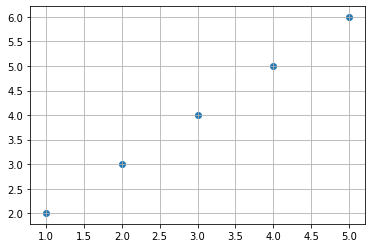

In [10]:
plt.scatter(x,y)
plt.grid(True)
plt.show()

<h3 style="color:rgb(0,84,139)">3.	Preprocesamiento	de	Texto	con	SciKit-learn</h3>

<p>Muchas	de	las	aplicaciones	de	análisis	de	texto	que	vamos	a	considerar	requerir	
tomar	un	texto	(por	ejemplo,	un	post),	tokenizar,	y	utilizando	los	tokens	como	
features,	posiblemente	después	de	la	eliminación	de	palabras	con	lematización	/	
stops	words.	Con	SciKit-learn	no	necesitamos	escribir	código	para	hacer	eso;	
podemos	utilizar	la	clase	CountVectorizer	en	su	lugar.	Una	instancia	de	la	clase	
se	crea	de	la	siguiente	manera:</p>

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer(min_df=1)

<p>Una	vez	que	hemos	creado	la	instancia,	podemos	utilizarlo	para	extraer	una	bolsa	de	
palabras</p>

<p>la	representación	de	una	colección	de	documentos	utilizando	el	método	scikit-learn
fit_transform.	En	este	primer	ejemplo	de	prueba,	usamos	una	lista	de	cadenas	como	
documentos,	de	la	siguiente	manera:</p>

In [14]:
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)

<p>fit_transform ha	extraído	siete	características	de	los	dos	“documentos”;	
podemos	ver	eso	con	el	método	get_feature_names().</p>

In [15]:
vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

<p>Se	puede	ver	cuántas	veces	cada	una	de	estas	siete	features se	produce	en	
los	dos	documentos	haciendo:</p>

In [16]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

<p>Tenga	en	cuenta	que	esta	llamada	devuelve	una	matriz	de	dos	filas,	una	por	
`documentos'.	Cada	fila	de	siete	elementos.	Cada	elemento	especifica	el	número	
de	elementos	de	una	determinada	feature	se	produjo	en	ese	documento.	
Entonces:</p>

In [17]:
X.toarray()[0]

array([1, 1, 1, 1, 1, 0, 1], dtype=int64)

<p>nos	da	el	vector	solo	para	el	primer	documento	(“How to format my hard disk"),
que	contiene	todas	las	palabras	elegidas	como	las	funciones,	excepto	para	los	
'problemas'.	En turno</p>

In [18]:
X.toarray	()	[1,2]

1

<p>nos	da	el	número	de	veces	que	la	palabra	‘hard’ que	ocurre	en	el	segundo	documento.</p>

<p>Veamos	ahora	cómo	funciona	esto	con	una	verdadera	colección	de	documentos</p>

<p>Vamos	a	utilizar	los	datos	del	dataset	‘20	Newsgroups’,	que	es	una	colección	de	
alrededor	de	20.000	documentos	procedentes	de	20	grupos	de	noticias	diferentes,	que	
se	utiliza	comúnmente	en	experimentos	de	clasificación	de	texto	y	la	agrupación	de	
texto.	</p>

<p>El	set	de	datos	se	puede	encontrar	en:
http://qwone.com/~jason/20Newsgroups/</p>

<p>Pero	ya	está	incluido	en	scikit-learn	y	se	puede	cargar	en	Python	haciendo:</p>

In [19]:
 from sklearn.datasets import fetch_20newsgroups

<p>Para	acelerar	las	cosas,	en	el	resto	del	laboratorio	sólo	utilizaremos	un	subconjunto	
de	los	documentos,	los	que	pertenecen	a	las	siguientes	4	categorías:</p>

In [20]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics','sci.med']

<p>Podemos	importar	los	documentos	pertenecientes	a	las	categorías	de	la	siguiente	
manera:</p>

In [22]:
 twenty_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)

<p>(La	primera	vez	que	se	hace	esto,	se	va	a	tomar	un	tiempo,	no	te preocupes.	También	es	
posible	que	puedas	recibir	un mensaje	de	alerta	acerca	de	no	encontrar	los	
controladores,	ignoralo)	</p>

<p>Los	archivos	han	sido	cargados	en	el	atributo	‘data’	del	objeto	twenty_train</p>

<p>Vamos	ahora	a	crear	un	nuevo	objeto	CountVectorizer:</p>

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vectorizer = CountVectorizer()

<p>Una	vez	más,	la función fit_transform	se	puede	utilizar	para	tokenizar	cada	
documento,	identificar	las	palabras	más	relevantes,	construir	un	diccionario	de	
tales	palabras,	y	crear	para	cada	documento	una	representación	vectorial	en	el	que	
las	palabras	son	las	features y	el	valor	de	estas	características	es	el	número	de	
ocurrencias de	cada	palabra	en	un	documento.</p>

<p>Al	igual	que	en	el	ejemplo	de	prueba	anterior:</p>

In [25]:
train_counts = vectorizer.fit_transform(twenty_train.data)

<p>Por	ejemplo,	si	ahora	queremos	ver	la	frecuencia	de la	palabra	'algorithm'	
se	produce	en	el	subconjunto	de	la	colección	20Newgroups	estamos	
considerando	la	siguiente	manera:</p>

In [26]:
 vectorizer.vocabulary_.get('algorithm')

4690

<h4>Qué	frecuencia	es	la	que	obtuviste?</h4>

<p>Respuesta: Obtuvo una frecuencia de 4690</p>

<p>Para	ver	cuántos	términos	fueron	extraídos,	podemos	utilizar	get_feature_names	()
que	hemos	visto	anteriormente:</p>

In [27]:
len(vectorizer.get_feature_names())

35788

<p>La	clase	CountVectorizer		de	SciKit-learn	 puede	hacer	más	
procesamiento	previo	de	una	colección	de	documentos	que	simples
tokenizaciones.	</p>

<p>Una	importante	etapa	de	preprocesamiento	adicional	de	que	la	clase	
puede	llevar	a	cabo	es	la	eliminación	de	stop	words.	</p>

<p>Esto	se	puede	hacer	mediante	la	especificación	de	un	parámetros	de	
CountVectorizer, como	sigue:</p>

In [31]:
vectorizer = CountVectorizer(stop_words='english')

<p>(Pista:	si	ponen	‘spanish’	considerará	las	stop	words o	palabras	más	comunes	y	
puntuaciones	del	español,	y	así	con	otros	idiomas)	</p>

<p>Para	ver	qué	palabras	son	palabras	stop	words,	hace	lo	siguiente:</p>

In [32]:
sorted(vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

<p>Para	hacer	stemming	(tener	la	palabra	raíz)	y un pre-procesamiento	
más	avanzado,	necesitamos	complementar	SciKit-learn	con	otra	
biblioteca	de	python,	NLTK.	</p>

<h3 style="color:rgb(0,84,139)">4.	Pre-procesamiento	más	avanzado	con	NLTK</h3>

<p>NLKT	es	compatible	con	la	mayoría	de	los	tipos	de	procesamiento previo
,	desde	POS	tagging	para	fragmentar,	para Inglés. También	viene	con	
varios	recursos	útiles	como	corpus	y	el	léxico.</p>

<p>NLTK	es	una	biblioteca	enorme,	mucho	más	grande	que	SciKit-learn	de	hecho,	
ya	que	contiene	también	su	propia	implementación	de	muchos	algoritmos	de	
aprendizaje	automático.	</p>

<p>	Sólo	vamos	a	tratar	acá	en	este	curso	de	sus	
funcionalidades</p>

In [34]:
 import nltk

<p>El	steamming	en	 NLTK incluye	implementaciones	de	varios algoritmos
muy	conocidos y	utilizados, incluyendo	el	Porter	Stemmer	y	el	Lancaster
Stemmer</p>

<h4>Para	crear	un steammer	de	Inglés	que	tiene	que	hacer	lo siguiente:</h4>

In [36]:
s = nltk.stem.SnowballStemmer('english')

<h4>Después	de	crear	el	steammer,	a	continuación,	puede	utilizarlo	para	llevar	a	la	
raíz	(steam) palabras	de	la	siguiente	manera:</h4>

In [37]:
s.stem("cats")

'cat'

In [38]:
s.stem("loving")

'love'

<h4>Otros	tipos	de	pre-procesamiento	de	NLTK	incluye	implementaciones	de	
muchos	de	los	módulos	de	procesamiento previo	y	analizadores	
sintácticos	que	discutimos	o	discutiremos	en	las clases:
    - identificadores	de	idioma
    - tokenizers	para	varios	idiomas
    - divisores	de	oraciones
    - POS	taggers
    - Chunkers
    - Parsers	</h4>

<p>Además,	NLTK	incluye	implementaciones	de	los	aspectos	del	análisis	de	texto	
que	vamos	a	discutir	en	este	módulo,	incluyendo
- NER	(Named	Entity	Recognition)
- Análisis	de	los	sentimientos
- Extraer	información	de	los	medios	de	redes sociales</p>

<p>Por	ejemplo,	las	instrucciones	siguientes	(	puede	que	tengas que	descargar	el	paquete	 NLTK	'punkt'	para	hacer	esto)</p>

In [39]:
 from nltk.tokenize import word_tokenize

In [43]:
#nltk.download('punkt') #if not used nltk.download()

In [44]:
 text = word_tokenize("And now for something completely different")

<p>producir	una	versión	tokenizada	de	la	frase,	que	luego	puede	ser	alimentado	en	el	
etiquetador	POS	(	puede	que tenga	que	descargar	el	paquete	'	maxent_...'	para	hacer	
esto)</p>

In [46]:
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_treebank_pos_tagger')
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

<h3 style="color:rgb(0,84,139)">5. La	integración	el	steammer	de	NLTK	con	el	CountVectorizer	de	SciKit-learn</h3>

<p>El	steammer	de	NLTK	puede	ser	utilizado	antes	de	la	alimentación	en	CountVectorizer	
de SciKit-learn,	obteniendo	así	un	índice	más	compacto.	</p>

<p>Una	forma	de	hacer	esto	es	definir	una	nueva	clase	StemmedCountVectorizer</p>

<p>Extendiendo	de CountVectorizer	y	redefiniendo	el	método	build_analyzer	()
que	se	encarga	de	pre-procesamiento	y	tokenización:</p>

<p>http:	//	scikit- learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVec
torizer.html</p>

<p>build_analyzer	()	toma	un	string	como	entrada	y	como	salida	una	lista	de	tokens:</p>

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

<p>Si	 modificamos	build_analyzer	()	para	aplicar		el	steammer	de	NLTK	a	la	salida	del	
método	build_analyzer	(),	obtenemos	una	versión	que	deriva	así:</p>

In [48]:
import nltk.stem

In [49]:
english_stemmer = nltk.stem.SnowballStemmer('english')

In [54]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

<p>Ahora	Podemos	crear	una	instancia	de	nuestra	clase!	</p>

In [55]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')

In [56]:
stem_analyze = stem_vectorizer.build_analyzer()

<p>como	se	puede	ver,	estos	nuevos	usos	Vectorizer	surgieron	versiones	de	fichas:</p>

In [57]:
Y = stem_analyze("John bought carrots and potatoes")

In [58]:
for tok in Y:
    print(tok)

john
bought
carrot
potato


<p>Si	utilizamos	este	Vectorizer	para	extraer	features	para	el	subconjunto	del	
dataset	20_Newsgroups que	consideramos antes,	vamos	a	tener	un	menor	
número	de	features:</p>

In [59]:
 from sklearn.datasets import fetch_20newsgroups

In [60]:
categories = ['alt.atheism','soc.religion.christian','comp.graphics', 'sci.med']

In [61]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [62]:
train_counts = stem_vectorizer.fit_transform(twenty_train.data) 

In [63]:
len(stem_vectorizer.get_feature_names())

26888